In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt

In [3]:
df_bankadd_full = pd.read_csv("D:/PYTN 098/bank-additional-full.csv", sep=';')
df_bankadd_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df_bank_add = pd.read_csv("D:/PYTN 098/bank-additional-full.csv", sep=';')
df_bank_add.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df_bank_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_bankadd_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
le = LabelEncoder()
df_bank_add['job'] = le.fit_transform(df_bank_add['job'])

key_location = le.classes_
print("job", le.classes_)

job ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']


In [8]:
df_bank_add['job'].head

<bound method NDFrame.head of 0        3
1        7
2        7
3        0
4        7
        ..
41183    5
41184    1
41185    5
41186    9
41187    5
Name: job, Length: 41188, dtype: int32>

In [9]:
le = LabelEncoder()
df_bank_add['marital'] = le.fit_transform(df_bank_add['marital'])

key_location = le.classes_
print("marital", le.classes_)

marital ['divorced' 'married' 'single' 'unknown']


In [10]:
le = LabelEncoder()
df_bank_add['education'] = le.fit_transform(df_bank_add['education'])

key_location = le.classes_
print("education", le.classes_)

education ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']


In [11]:
le = LabelEncoder()
df_bank_add['y'] = le.fit_transform(df_bank_add['y'])

key_location = le.classes_
print("y", le.classes_)

y ['no' 'yes']


In [12]:
df_bank_add['marital'].head

<bound method NDFrame.head of 0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: marital, Length: 41188, dtype: int32>

In [13]:
df_bank_add['education'].head

<bound method NDFrame.head of 0        0
1        3
2        3
3        1
4        3
        ..
41183    5
41184    5
41185    6
41186    5
41187    5
Name: education, Length: 41188, dtype: int32>

In [14]:
df_bank_add['y'].head

<bound method NDFrame.head of 0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32>

In [15]:
df_bank_add.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
X = df_bank_add[["age","job", "marital", "education"]]
Y = df_bank_add['y']

X.head()

,age,job,marital,education
0,56,3,1,0
1,57,7,1,3
2,37,7,1,3
3,40,0,1,1
4,56,7,1,3


In [17]:
print(Y[:5])

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


NAIVE BAYES

In [18]:
model_bank_add_NB = GaussianNB()
model_bank_add_NB.fit(X, Y)

GaussianNB()

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=8)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(32950, 4) (8238, 4) (32950,) (8238,)


In [20]:
model_bank_add_NB = GaussianNB()
model_bank_add_NB.fit(X_train, Y_train)

GaussianNB()

In [21]:
hasil_bank_add = model_bank_add_NB.predict(X_test)

print(classification_report(Y_test, hasil_bank_add))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7274
           1       0.47      0.04      0.07       964

    accuracy                           0.88      8238
   macro avg       0.68      0.52      0.51      8238
weighted avg       0.84      0.88      0.84      8238



In [22]:
confusion_matrix(Y_test, hasil_bank_add)

array([[7232,   42],
       [ 926,   38]], dtype=int64)

In [23]:
def ConfusionMatrix(target_asli, hasil_prediksi, jumlah_kategori=4, judul_grafik="", label=False):
  if (label == False): label = range(jumlah_kategori)
  cm = confusion_matrix(target_asli, hasil_prediksi)

  fig, ax = plt.subplots(figsize=(jumlah_kategori+1, jumlah_kategori+1))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.yaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_ylim(jumlah_kategori-0.5, -0.5)
  for i in range(jumlah_kategori):
      for j in range(jumlah_kategori):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

  plt.title(judul_grafik)
  plt.show()

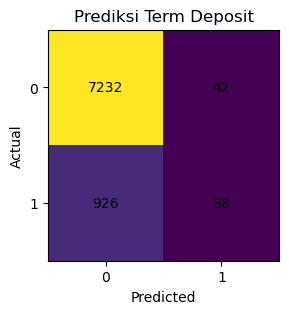

In [24]:
ConfusionMatrix(Y_test, hasil_bank_add, 2, "Prediksi Term Deposit")

DECISION TREE

In [25]:
model_bank_add_DT = DecisionTreeClassifier()
model_bank_add_DT.fit(X_train, Y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7274
           1       0.32      0.06      0.10       964

    accuracy                           0.87      8238
   macro avg       0.60      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238



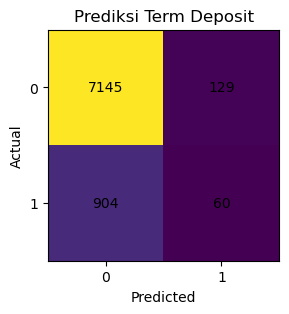

In [26]:
hasil_bank_add = model_bank_add_DT.predict(X_test)

print(classification_report(Y_test, hasil_bank_add))

ConfusionMatrix(Y_test, hasil_bank_add, 2, "Prediksi Term Deposit")

RANDOM FOREST

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7274
           1       0.32      0.06      0.11       964

    accuracy                           0.87      8238
   macro avg       0.61      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238



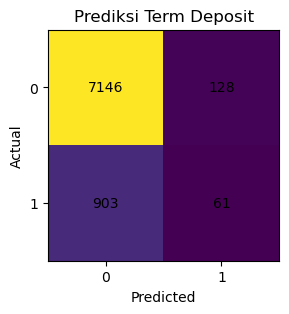

In [27]:
model_bank_add_RF = RandomForestClassifier(n_estimators=100)
model_bank_add_RF.fit(X_train, Y_train)

hasil_bank_add = model_bank_add_RF.predict(X_test)

print(classification_report(Y_test, hasil_bank_add))

ConfusionMatrix(Y_test, hasil_bank_add, 2, "Prediksi Term Deposit")

In [28]:
model_bank_add_RF.feature_importances_

array([0.61501478, 0.19286828, 0.06338188, 0.12873506])

In [29]:
feature_cols = list(X.columns)
print(feature_cols)

['age', 'job', 'marital', 'education']


In [30]:
df_fi = pd.DataFrame(model_bank_add_RF.feature_importances_, index=feature_cols, columns=['Importances'])
df_fi

,Importances
age,0.615015
job,0.192868
marital,0.063382
education,0.128735


SUPPORT VECTOR MACHINE

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      7274
           1       0.32      0.06      0.11       964

    accuracy                           0.87      8238
   macro avg       0.61      0.52      0.52      8238
weighted avg       0.82      0.87      0.84      8238



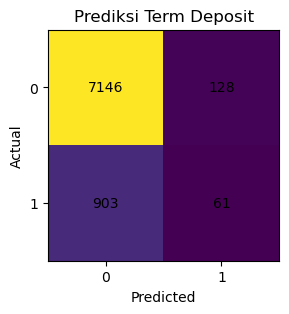

In [31]:
model_bank_add_svm = SVC(kernel="rbf")
model_bank_add_svm.fit(X_train, Y_train)

# evaluasi model
hasil_bank_add_test = model_bank_add_svm.predict(X_test)

print(classification_report(Y_test, hasil_bank_add))

ConfusionMatrix(Y_test, hasil_bank_add, 2, "Prediksi Term Deposit")

LOGISTIC REGRESSION

In [32]:
model_bank_add_LR = LogisticRegression()
model_bank_add_LR.fit(X, Y)

LogisticRegression()

In [33]:
confusion_matrix(Y, model_bank_add_LR.predict(X))

array([[36548,     0],
       [ 4640,     0]], dtype=int64)

In [34]:
def ConfusionMatrix(target_asli, hasil_prediksi, jumlah_kategori=4, judul_grafik="", label=False):
  if (label == False): label = range(jumlah_kategori)
  cm = confusion_matrix(target_asli, hasil_prediksi)

  fig, ax = plt.subplots(figsize=(jumlah_kategori+1, jumlah_kategori+1))
  ax.imshow(cm)
  ax.grid(False)
  ax.xaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.yaxis.set(ticks=range(jumlah_kategori), ticklabels=label)
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Actual")
  ax.set_ylim(jumlah_kategori-0.5, -0.5)
  for i in range(jumlah_kategori):
      for j in range(jumlah_kategori):
          ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

  plt.title(judul_grafik)
  plt.show()

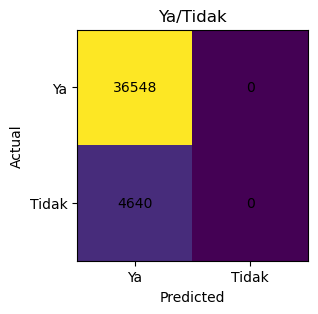

In [35]:
ConfusionMatrix(Y, model_bank_add_LR.predict(X), 2, "Ya/Tidak", ["Ya", "Tidak"])

In [36]:
classification_report(Y, model_bank_add_LR.predict(X))

c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.89      1.00      0.94     36548\n           1       0.00      0.00      0.00      4640\n\n    accuracy                           0.89     41188\n   macro avg       0.44      0.50      0.47     41188\nweighted avg       0.79      0.89      0.83     41188\n'

In [37]:
report = classification_report(Y, model_bank_add_LR.predict(X))

print(report)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     36548
           1       0.00      0.00      0.00      4640

    accuracy                           0.89     41188
   macro avg       0.44      0.50      0.47     41188
weighted avg       0.79      0.89      0.83     41188



c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ridar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-NEAREST NEIGHBOR (KNN)

In [38]:
model_bank_add_KNN = KNeighborsClassifier()
model_bank_add_KNN.fit(X, Y)

KNeighborsClassifier()

IndexError: index 2 is out of bounds for axis 1 with size 2

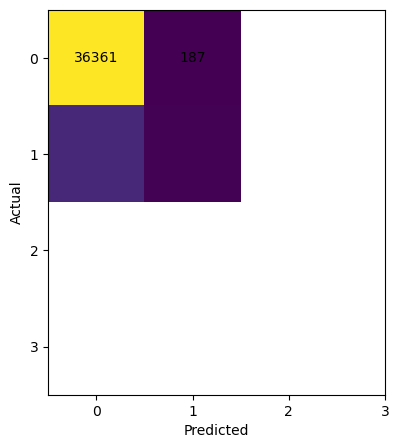

In [40]:
ConfusionMatrix(Y, model_bank_add_KNN.predict(X))

In [41]:
print(classification_report(Y, model_bank_add_KNN.predict(X)))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     36548
           1       0.66      0.08      0.14      4640

    accuracy                           0.89     41188
   macro avg       0.78      0.54      0.54     41188
weighted avg       0.87      0.89      0.85     41188



In [42]:
accuracy_score(Y, model_bank_add_KNN.predict(X))

0.8917403127124405

In [43]:
skor = []
jumlah_k = range(1, 41)

for k in jumlah_k:
  model_bank_add_KNN = KNeighborsClassifier(n_neighbors = k)
  model_bank_add_KNN.fit(X, Y)

  skor.append(accuracy_score(Y, model_bank_add_KNN.predict(X)))

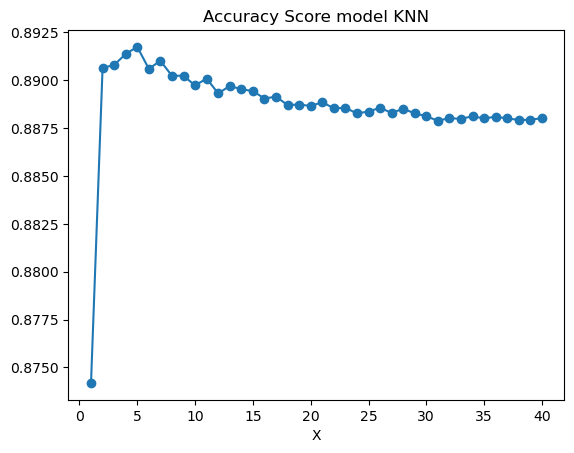

In [44]:
plt.plot(jumlah_k, skor, marker="o")
plt.title("Accuracy Score model KNN")
plt.xlabel("X")
plt.show()